# Logistic Regression using Gradient Descent

This notebook implements *logistic regression* using *gradient descent* to classify the given dataset. The main goal is to visualize the dataset, build the model from scratch, and draw the decision boundary line.

## Getting Ready

First things first, we import both libraries and the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
sns.set_style('darkgrid')

In [3]:
X_train = np.array([[0.08, 0.72], [0.26, 0.58],
                    [0.45, 0.15], [0.6, 0.3],
                    [0.1, 1.0], [0.35, 0.95],
                    [0.7, 0.65], [0.92, 0.45]])

y_train = np.array([1, 1, 1, 1, 0, 0, 0, 0])

X_test = np.array([[0.1, 0.9], [0.4, 0.2],
                   [0.8, 0.5], [0.2, 0.6]])

In [4]:
df = pd.DataFrame({
  'x1': X_train[:, 0],
  'x2': X_train[:, 1],
  'y': y_train
})

## Exploratory Data Analysis

Before actually using the data for modeling, we explore the dataset to get a better understanding.

In [5]:
df.shape

(8, 3)

In [6]:
df

,x1,x2,y
0,0.08,0.72,1
1,0.26,0.58,1
2,0.45,0.15,1
3,0.60,0.30,1
4,0.10,1.00,0
5,0.35,0.95,0
6,0.70,0.65,0
7,0.92,0.45,0


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x1,8.0,0.4325,0.294946,0.08,0.2200,0.400,0.6250,0.92
x2,8.0,0.6000,0.296359,0.15,0.4125,0.615,0.7775,1.00
y,8.0,0.5000,0.534522,0.00,0.0000,0.500,1.0000,1.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      8 non-null      float64
 1   x2      8 non-null      float64
 2   y       8 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 320.0 bytes


In [9]:
df.isna().sum()

x1    0
x2    0
y     0
dtype: int64

In [10]:
df['y'].value_counts()

1    4
0    4
Name: y, dtype: int64

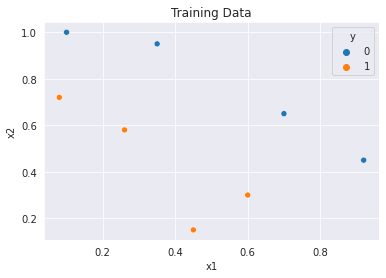

In [11]:
sns.scatterplot(x='x1', y='x2', hue='y', data=df)
plt.title('Training Data')
plt.show()

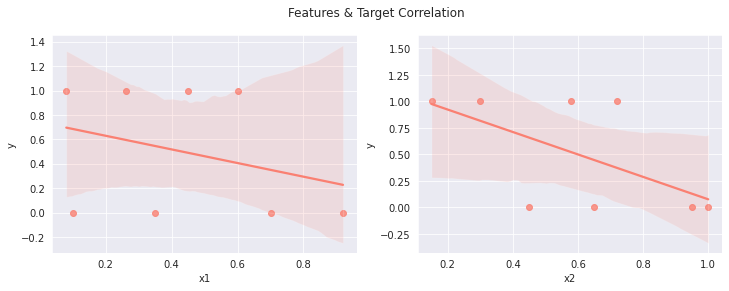

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Features & Target Correlation')
sns.regplot(x='x1', y='y', data=df, color='salmon', ax=ax1)
sns.regplot(x='x2', y='y', data=df, color='salmon', ax=ax2)
plt.show()

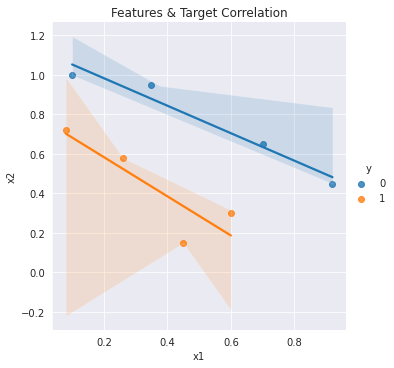

In [13]:
sns.lmplot(x='x1', y='x2', hue='y', data=df)
plt.title('Features & Target Correlation')
plt.show()

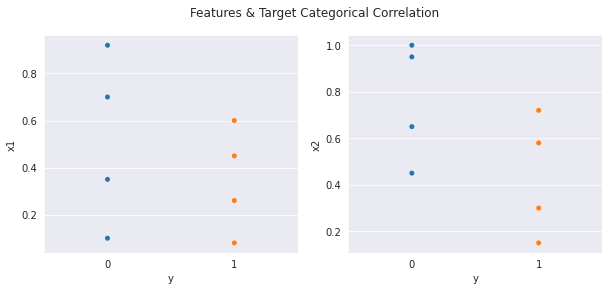

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Features & Target Categorical Correlation')
sns.swarmplot(x='y', y='x1', data=df, ax=ax1)
sns.swarmplot(x='y', y='x2', data=df, ax=ax2)
plt.show()

## Modeling

We define the functions necessary for the calculation of gradient descent.

In [15]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def predict(X, weight, bias):
  preds = np.dot(X, weight) + bias
  theta = sigmoid(preds)
  y_pred = [1 if i >= 0.5 else 0 for i in theta]
  return y_pred

def cost_function(y, y_pred):
  m = len(y)
  return -1 * (np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred)) / m)

def derivative_weight(X, y, y_pred):
  m = len(y)
  return (1/m) * np.dot(X.T, y_pred - y)

def derivative_bias(y, y_pred):
  m = len(y)
  return (1/m) * np.sum(y_pred - y)

def gradient_descent(X, y, learning_rate=0.01, epochs=10000):
  weight = np.random.randn(X.shape[1])
  bias = 0
  error = []
  for _ in range(epochs):
    preds = np.dot(X, weight) + bias
    y_pred = sigmoid(preds)
    weight = weight - learning_rate * derivative_weight(X, y, y_pred)
    bias = bias - learning_rate * derivative_bias(y, y_pred)
    error.append(cost_function(y, y_pred))
  sns.lineplot(x=np.arange(1, epochs), y=error[1:])
  plt.xlabel('Number of Epochs')
  plt.ylabel('Error/Loss')
  plt.show()
  return weight, bias

We can now find the optimal weight and bias by using the functions we defined beforehand and classify the test set.

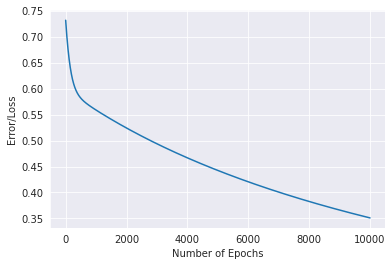

Weights: [-2.91125654 -4.14864344]
Bias: 3.660218605567466


In [16]:
weight, bias = gradient_descent(X_train, y_train)
print(f'Weights: {weight}')
print(f'Bias: {bias}')

## Model Prediction

With the weight and bias, we can now use our model to classify the test set.

In [17]:
y_pred = predict(X_test, weight, bias)

To better visualize it, we store the test set and its prediction into a DataFrame.

In [18]:
result_df = pd.DataFrame({
    'x1': X_test[:, 0],
    'x2': X_test[:, 1],
    'y': y_pred
})

result_df

,x1,x2,y
0,0.1,0.9,0
1,0.4,0.2,1
2,0.8,0.5,0
3,0.2,0.6,1


Furthermore, we can draw a decision boundary line within the datapoints.

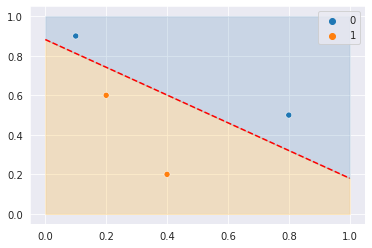

In [19]:
c = -bias / weight[1]
m = -weight[0] / weight[1]
xmin, xmax = 0, 1
ymin, ymax = 0, 1
x_dim = np.array([xmin, xmax])
y_dim = m * x_dim + c
sns.lineplot(x=x_dim, y=y_dim, color='red' , linestyle='--')
plt.fill_between(x_dim, y_dim, ymin, color='orange', alpha=0.2)
plt.fill_between(x_dim, y_dim, ymax, color='steelblue', alpha=0.2)
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred)
plt.show()